# SiamMask
Fast Online Object Tracking and Segmentation: A Unifying Approach:
<img src="https://camo.githubusercontent.com/5c38236e1e40efcae31beb39d2f074820a261501ed18d706ec11b8b16bb6b809/687474703a2f2f7777772e726f626f74732e6f782e61632e756b2f7e7177616e672f5369616d4d61736b2f696d672f5369616d4d61736b2e6a7067">

**Original code :** [SiamMask](https://github.com/foolwood/SiamMask) by [Qiang Wang](https://github.com/foolwood)

**[Fast Online Object Tracking and Segmentation: A Unifying Approach](https://arxiv.org/abs/1812.05050)**,

Qiang Wang, Li Zhang, Luca Bertinetto, Weiming Hu, Philip H.S. Torr,

CVPR 2019

**Citation**
```
@article{wang2019fast,
      title={Fast Online Object Tracking and Segmentation: A Unifying Approach},
      author={Qiang Wang and Li Zhang and Luca Bertinetto and Weiming Hu and Philip H. S. Torr},
      journal={CVPR},
      year={2019}
}
```

#1. Environment Setup

In [ ]:
!pip install colorama
!pip install numpy==1.23.0

In [ ]:
! sudo apt-get install jq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 357 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libonig5 amd64 6.9.7.1-2build1 [172 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libjq1 amd64 1.6-2.1ubuntu3 [133 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 jq amd64 1.6-2.1ubuntu3 [52.5 kB]
Fetched 357 kB in 1s (525 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
git_repo_url = 'https://github.com/snu-rvl/SiamMask.git'

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# download codes
!git clone {git_repo_url}

Cloning into 'SiamMask'...
remote: Enumerating objects: 387, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 387 (delta 10), reused 3 (delta 0), pack-reused 360
Receiving objects: 100% (387/387), 503.07 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (330/330), done.


In [ ]:
import sys
import os
from os.path import exists, join, basename, splitext

project_name = splitext(basename(git_repo_url))[0]
sys.path.append(project_name)
sys.path.append(join(project_name, 'experiments', 'siammask_sharp'))

In [ ]:
exp_path = join(project_name, 'experiments/siammask_sharp')
pretrained_path1 = join(exp_path, 'SiamMask_DAVIS.pth')
pretrained_path2 = join(exp_path, 'SiamMask_VOT.pth')
pretrained_path3 = join(project_name, 'experiments/resnet.model')

# download pretrained weights
if not exists(pretrained_path1):
  !cd {exp_path} && wget http://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth
if not exists(pretrained_path2):
  !cd {exp_path} && wget http://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth
if not exists(pretrained_path3):
  !cd {project_name}/experiments && wget http://www.robots.ox.ac.uk/~qwang/resnet.model

--2024-08-13 01:40:10--  http://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth [following]
--2024-08-13 01:40:10--  https://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105878246 (101M)
Saving to: ‘SiamMask_DAVIS.pth’

SiamMask_DAVIS.pth  100%[===================>] 100.97M  15.4MB/s    in 7.5s    

2024-08-13 01:40:18 (13.4 MB/s) - ‘SiamMask_DAVIS.pth’ saved [105878246/105878246]

URL transformed to HTTPS due to an HSTS policy
--2024-08-13 01:40:18--  https://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Conn

In [ ]:
# 미리 가공한 train dataset 다운로드
!cd /content/drive/MyDrive/SiamMask/data/ytb_vos && gdown https://drive.google.com/uc?id=1vD55oyBloyAKFBW4fXt_UFMJ4DKfAcvX/ #train.json
!cd /content && gdown https://drive.google.com/uc?id=1iJbKGZQUtsXe7R_GKJUB1ePdRa9tE2Iu/ && unzip crop511.zip #crop511.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: crop511/train/d3069da8bb/000070.00.m.png  
  inflating: crop511/train/d3069da8bb/000075.00.x.jpg  
  inflating: crop511/train/d3069da8bb/000075.00.m.png  
  inflating: crop511/train/d3069da8bb/000080.00.x.jpg  
  inflating: crop511/train/d3069da8bb/000080.00.m.png  
  inflating: crop511/train/d3069da8bb/000085.00.x.jpg  
  inflating: crop511/train/d3069da8bb/000085.00.m.png  
  inflating: crop511/train/d3069da8bb/000090.00.x.jpg  
  inflating: crop511/train/d3069da8bb/000090.00.m.png  
   creating: crop511/train/d38bc77e2c/
  inflating: crop511/train/d38bc77e2c/000095.00.x.jpg  
  inflating: crop511/train/d38bc77e2c/000095.00.m.png  
  inflating: crop511/train/d38bc77e2c/000100.00.x.jpg  
  inflating: crop511/train/d38bc77e2c/000100.00.m.png  
  inflating: crop511/train/d38bc77e2c/000105.00.x.jpg  
  inflating: crop511/train/d38bc77e2c/000105.00.m.png  
  inflating: crop511/train/d38bc77e2c/000110.00.x.jpg  
  inflating: crop511/train/d3

In [ ]:
cd /content/drive/MyDrive/SiamMask

/content/drive/MyDrive/SiamMask


In [ ]:
# install pyc library
!bash make.sh

region.c: In function ‘__pyx_pw_6region_7Polygon_5__str__’:
region.c:9302:69: warning: ‘__pyx_v_i’ may be used uninitialized in this function []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmaybe-uninitialized-Wmaybe-uninitialized]8;;]
 9302 |   __pyx_t_7 = PyFloat_FromDouble((__pyx_v_self->_c_region_polygon->x[__pyx_v_i])); if (unlikely(!__pyx_t_7)) __PYX_ERR(0, 147, __pyx_L1_error)
      |                                                                     ^
region.c:9194:8: note: ‘__pyx_v_i’ was declared here
 9194 |   long __pyx_v_i;
      |        ^~~~~~~~~
In file included from src/region.c:11:
src/buffer.h: In function ‘list_destroy’:
src/buffer.h:134:17: warning: this ‘if’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation]8;;]
  134 |                 if ((*B)->buffer[i]) free((*B)->buffer[i]); (*B)->buffer[i] = NULL;
      |                 ^~
src/buffer.h:134:6

In [ ]:
!cd /content/drive/MyDrive/SiamMask/data && gdown https://drive.google.com/uc?id=1-8OSeUwmHBF8_3MHdWMZfb6-veAqc4R9 #VOT2018.json
!cd /content/drive/MyDrive/SiamMask/data && bash get_test_data.sh

Downloading...
From: https://drive.google.com/uc?id=1-8OSeUwmHBF8_3MHdWMZfb6-veAqc4R9
To: /content/drive/MyDrive/SiamMask/data/VOT2018.json
100% 135k/135k [00:00<00:00, 4.72MB/s]


#2. SiamMask network

Siammask 네트워크 분석

In [ ]:
from models.siammask import SiamMask
from models.features import MultiStageFeature
from models.mask import Mask
import torch
import torch.nn as nn
from utils.load_helper import load_pretrain
from experiments.siammask_base.resnet import resnet50

SiamMask architecture
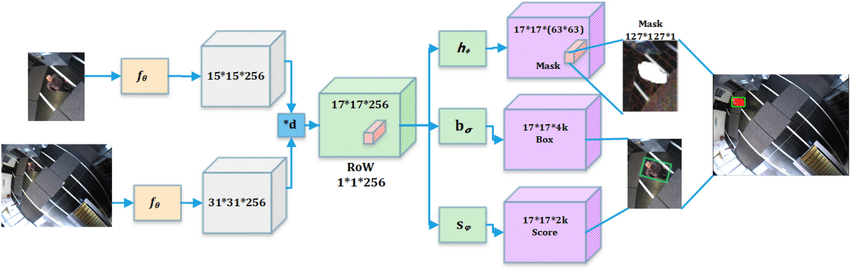

ResNet50 architecture

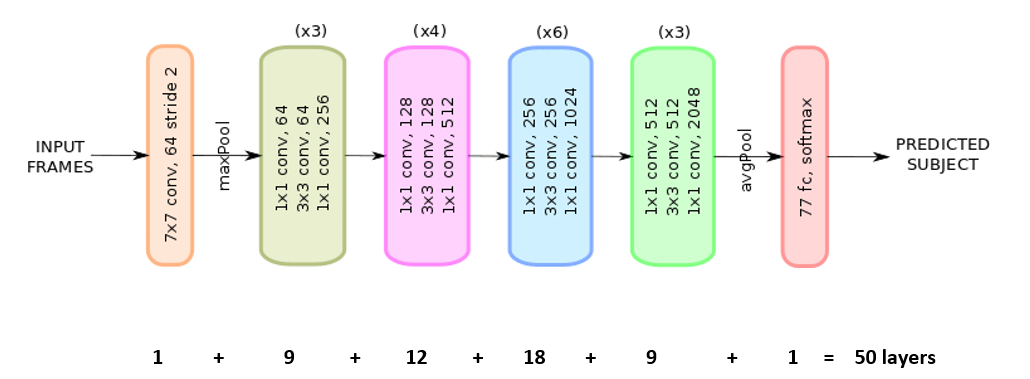

In [ ]:
class ResDownS(nn.Module):
    def __init__(self, inplane, outplane):
        super(ResDownS, self).__init__()
        #### TODO nn.Sequential을 통해 nn.Conv2d, nn.BatchNorm2d를 순차적으로 쌓은 신경망 모듈을 정의해보세요.
        '''
        Conv2d (https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
            in_channels는 inplane, out_channel는 outplane, kernel_size는 1, bias는 False로 입
        BatchNorm2d https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
            num_features는 outplane 입력
        '''
        self.downsample =

    def forward(self, x):
        x = self.downsample(x)
        if x.size(3) < 20:
            l = 4
            r = -4
            x = x[:, :, l:r, l:r]
        return x
import sys

class ResDown(MultiStageFeature):
    def __init__(self, pretrain=False):
        super(ResDown, self).__init__()
        self.features = resnet50(layer3=True, layer4=False)
        if pretrain:
            load_pretrain(self.features,'/content/drive/MyDrive/SiamMask/experiments/resnet.model')

        self.downsample = ResDownS(1024, 256)

        self.layers = [self.downsample, self.features.layer2, self.features.layer3]
        self.train_nums = [1, 3]
        self.change_point = [0, 0.5]

        self.unfix(0.0)

    def param_groups(self, start_lr, feature_mult=1):
        lr = start_lr * feature_mult

        def _params(module, mult=1):
            params = list(filter(lambda x:x.requires_grad, module.parameters()))
            if len(params):
                return [{'params': params, 'lr': lr * mult}]
            else:
                return []

        groups = []
        groups += _params(self.downsample)
        groups += _params(self.features, 0.1)
        return groups

    def forward(self, x):
        output = self.features(x)
        p3 = self.downsample(output[1])
        return p3

 multi-channel response map generation with depth-wise cross-correlation \\
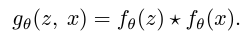

In [ ]:
import torch.nn.functional as F
def conv2d_dw_group(x, kernel):
    batch, channel = kernel.shape[:2]
    #### TODO depth-wise cross-correlation 구현해보세요
    '''
      x, kernel 텐서를 view를 이용해 형태 변환
      F.conv2d를 이용해 group convolution을 수행
    '''

    out = out.view(batch, channel, out.size(2), out.size(3))
    return out

In [ ]:
class RPN(nn.Module):
    def __init__(self):
        super(RPN, self).__init__()

    def forward(self, z_f, x_f):
        raise NotImplementedError

    def template(self, template):
        raise NotImplementedError

    def track(self, search):
        raise NotImplementedError

    def param_groups(self, start_lr, feature_mult=1, key=None):
        if key is None:
            params = filter(lambda x:x.requires_grad, self.parameters())
        else:
            params = [v for k, v in self.named_parameters() if (key in k) and v.requires_grad]
        params = [{'params': params, 'lr': start_lr * feature_mult}]
        return params

class DepthCorr(nn.Module):
    def __init__(self, in_channels, hidden, out_channels, kernel_size=3):
        super(DepthCorr, self).__init__()
        # adjust layer for asymmetrical features
        self.conv_kernel = nn.Sequential(
                nn.Conv2d(in_channels, hidden, kernel_size=kernel_size, bias=False),
                nn.BatchNorm2d(hidden),
                nn.ReLU(inplace=True),
                )
        self.conv_search = nn.Sequential(
                nn.Conv2d(in_channels, hidden, kernel_size=kernel_size, bias=False),
                nn.BatchNorm2d(hidden),
                nn.ReLU(inplace=True),
                )

        self.head = nn.Sequential(
                nn.Conv2d(hidden, hidden, kernel_size=1, bias=False),
                nn.BatchNorm2d(hidden),
                nn.ReLU(inplace=True),
                nn.Conv2d(hidden, out_channels, kernel_size=1)
                )

    def forward_corr(self, kernel, input):
        kernel = self.conv_kernel(kernel)
        input = self.conv_search(input)
        feature = conv2d_dw_group(input, kernel)
        return feature

    def forward(self, kernel, search):
        feature = self.forward_corr(kernel, search)
        out = self.head(feature)
        return out

class UP(RPN):
    def __init__(self, anchor_num=5, feature_in=256, feature_out=256):
        super(UP, self).__init__()
        # anchor_num은 ratio 수와 scales 수의 곱으로 구할 수 있음. 여기서는 5개
        # "ratios": [0.33, 0.5, 1, 2, 3],
        # "scales": [8],

        self.anchor_num = anchor_num
        self.feature_in = feature_in
        self.feature_out = feature_out

        self.cls_output = 2 * self.anchor_num
        self.loc_output = 4 * self.anchor_num

        self.cls = DepthCorr(feature_in, feature_out, self.cls_output)
        self.loc = DepthCorr(feature_in, feature_out, self.loc_output)

    def forward(self, z_f, x_f):
        cls = self.cls(z_f, x_f)
        loc = self.loc(z_f, x_f)
        return cls, loc


In [ ]:
class MaskCorr(Mask):
    def __init__(self, oSz=63):
        super(MaskCorr, self).__init__()
        self.oSz = oSz
        self.mask = DepthCorr(256, 256, self.oSz**2)

    def forward(self, z, x):
        return self.mask(z, x)


class Custom(SiamMask):
    def __init__(self, pretrain=False, **kwargs):
        super(Custom, self).__init__(**kwargs)
        self.features = ResDown(pretrain=pretrain)
        self.rpn_model = UP(anchor_num=self.anchor_num, feature_in=256, feature_out=256)
        self.mask_model = MaskCorr()

    def template(self, template):
        self.zf = self.features(template)

    def track(self, search):
        search = self.features(search)
        rpn_pred_cls, rpn_pred_loc = self.rpn(self.zf, search)
        return rpn_pred_cls, rpn_pred_loc

    def track_mask(self, search):
        search = self.features(search)
        rpn_pred_cls, rpn_pred_loc = self.rpn(self.zf, search)
        pred_mask = self.mask(self.zf, search)
        return rpn_pred_cls, rpn_pred_loc, pred_mask

Train code

In [ ]:
import logging
import os
import cv2
import shutil
import time
import json
import math
import torch
import easydict
from torch.utils.data import DataLoader

from utils.log_helper import init_log, print_speed, add_file_handler, Dummy
from utils.load_helper import load_pretrain, restore_from
from utils.average_meter_helper import AverageMeter

from datasets.siam_mask_dataset import DataSets

from utils.lr_helper import build_lr_scheduler
from utils.config_helper import load_config
from torch.utils.collect_env import get_pretty_env_info

torch.backends.cudnn.benchmark = True

args = easydict.EasyDict({

        "lr": 0.001,
        "epochs": 20,
        "batch": 2,
        "workers": 20,
        "config": "experiments/siammask_base/config.json",
        "resume": False,
        "pretrained": False,
        "momentum": 0.9,
        "weight_decay": 1e-4,
        "start_epoch" :0,
        "clip": 10.0,
        "print_freq" : 10
})

best_acc = 0.


def build_data_loader(cfg):

    train_set = DataSets(cfg['train_datasets'], cfg['anchors'], args.epochs)
    train_set.shuffle()

    if not 'val_datasets' in cfg.keys():
        cfg['val_datasets'] = cfg['train_datasets']
    val_set = DataSets(cfg['val_datasets'], cfg['anchors'])
    val_set.shuffle()

    train_loader = DataLoader(train_set, batch_size=args.batch, num_workers=args.workers,
                              pin_memory=True, sampler=None)
    val_loader = DataLoader(val_set, batch_size=args.batch, num_workers=args.workers,
                            pin_memory=True, sampler=None)

    return train_loader, val_loader


def build_opt_lr(model, cfg, args, epoch):
    backbone_feature = model.features.param_groups(cfg['lr']['start_lr'], cfg['lr']['feature_lr_mult'])
    if len(backbone_feature) == 0:
        trainable_params = model.rpn_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['rpn_lr_mult'], 'mask')
    else:
        trainable_params = backbone_feature + \
                           model.rpn_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['rpn_lr_mult']) + \
                           model.mask_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['mask_lr_mult'])

    optimizer = torch.optim.SGD(trainable_params, args.lr,
                                momentum=args.momentum,
                                weight_decay=args.weight_decay)

    lr_scheduler = build_lr_scheduler(optimizer, cfg['lr'], epochs=args.epochs)

    lr_scheduler.step(epoch)

    return optimizer, lr_scheduler

def train(train_loader, model, optimizer, lr_scheduler, epoch, cfg):
    global tb_index, best_acc, cur_lr
    cur_lr = lr_scheduler.get_cur_lr()
    avg = AverageMeter()
    model.train()
    model = model.cuda()
    end = time.time()

    def is_valid_number(x):
        return not(math.isnan(x) or math.isinf(x) or x > 1e4)

    num_per_epoch = len(train_loader.dataset) // args.epochs // args.batch
    start_epoch = epoch
    epoch = epoch
    for iter, input in enumerate(train_loader):

        if epoch != iter // num_per_epoch + start_epoch:  # next epoch
            epoch = iter // num_per_epoch + start_epoch
            lr_scheduler.step(epoch)
            cur_lr = lr_scheduler.get_cur_lr()

        data_time = time.time() - end
        avg.update(data_time=data_time)
        x = {
            'cfg': cfg,
            'template': torch.autograd.Variable(input[0]).cuda(),
            'search': torch.autograd.Variable(input[1]).cuda(),
            'label_cls': torch.autograd.Variable(input[2]).cuda(),
            'label_loc': torch.autograd.Variable(input[3]).cuda(),
            'label_loc_weight': torch.autograd.Variable(input[4]).cuda(),
            'label_mask': torch.autograd.Variable(input[6]).cuda(),
            'label_mask_weight': torch.autograd.Variable(input[7]).cuda(),
        }

        outputs = model(x)

        rpn_cls_loss, rpn_loc_loss, rpn_mask_loss = torch.mean(outputs['losses'][0]), torch.mean(outputs['losses'][1]), torch.mean(outputs['losses'][2])
        mask_iou_mean, mask_iou_at_5, mask_iou_at_7 = torch.mean(outputs['accuracy'][0]), torch.mean(outputs['accuracy'][1]), torch.mean(outputs['accuracy'][2])

        cls_weight, reg_weight, mask_weight = cfg['loss']['weight']

        loss = rpn_cls_loss * cls_weight + rpn_loc_loss * reg_weight + rpn_mask_loss * mask_weight

        optimizer.zero_grad()
        loss.backward()

        if cfg['clip']['split']:
            torch.nn.utils.clip_grad_norm_(model.module.features.parameters(), cfg['clip']['feature'])
            torch.nn.utils.clip_grad_norm_(model.module.rpn_model.parameters(), cfg['clip']['rpn'])
            torch.nn.utils.clip_grad_norm_(model.module.mask_model.parameters(), cfg['clip']['mask'])
        else:
            torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)  # gradient clip

        if is_valid_number(loss.item()):
            optimizer.step()

        siammask_loss = loss.item()

        batch_time = time.time() - end

        avg.update(batch_time=batch_time, rpn_cls_loss=rpn_cls_loss, rpn_loc_loss=rpn_loc_loss,
                   rpn_mask_loss=rpn_mask_loss, siammask_loss=siammask_loss,
                   mask_iou_mean=mask_iou_mean, mask_iou_at_5=mask_iou_at_5, mask_iou_at_7=mask_iou_at_7)

        end = time.time()

        if (iter + 1) % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}] lr: {lr:.6f}\t{batch_time:s}\t{data_time:s}'
                        '\t{rpn_cls_loss:s}\t{rpn_loc_loss:s}\t{rpn_mask_loss:s}\t{siammask_loss:s}'
                        '\t{mask_iou_mean:s}\t{mask_iou_at_5:s}\t{mask_iou_at_7:s}'.format(
                        epoch+1, (iter + 1) % num_per_epoch, num_per_epoch, lr=cur_lr, batch_time=avg.batch_time,
                        data_time=avg.data_time, rpn_cls_loss=avg.rpn_cls_loss, rpn_loc_loss=avg.rpn_loc_loss,
                        rpn_mask_loss=avg.rpn_mask_loss, siammask_loss=avg.siammask_loss, mask_iou_mean=avg.mask_iou_mean,
                        mask_iou_at_5=avg.mask_iou_at_5,mask_iou_at_7=avg.mask_iou_at_7))
            print_speed(iter + 1, avg.batch_time.avg, args.epochs * num_per_epoch)


cfg = load_config(args)


# build dataset
train_loader, val_loader = build_data_loader(cfg)


model = Custom(pretrain=True, anchors=cfg['anchors'])

if args.pretrained:
    model = load_pretrain(model, args.pretrained)

model = model.cuda()
dist_model = torch.nn.DataParallel(model, list(range(torch.cuda.device_count()))).cuda()

if args.resume and args.start_epoch != 0:
    model.features.unfix((args.start_epoch - 1) / args.epochs)

optimizer, lr_scheduler = build_opt_lr(model, cfg, args, args.start_epoch)
# optionally resume from a checkpoint
if args.resume:
    assert os.path.isfile(args.resume), '{} is not a valid file'.format(args.resume)
    model, optimizer, args.start_epoch, best_acc, arch = restore_from(model, optimizer, args.resume)
    dist_model = torch.nn.DataParallel(model, list(range(torch.cuda.device_count()))).cuda()


print('model prepare done')

train(train_loader, dist_model, optimizer, lr_scheduler, args.start_epoch, cfg)

[2024-08-13 01:44:25,585-rk0-siam_mask_dataset.py# 36] loading data/ytb_vos/train.json
INFO:global:loading data/ytb_vos/train.json
[2024-08-13 01:44:26,079-rk0-siam_mask_dataset.py# 74] data/ytb_vos/train.json loaded.
INFO:global:data/ytb_vos/train.json loaded.
[2024-08-13 01:44:26,169-rk0-siam_mask_dataset.py#133] SubDataSet ytb_vos start-index 0 select [200000/3000] path {}.{}.{}.jpg
INFO:global:SubDataSet ytb_vos start-index 0 select [200000/3000] path {}.{}.{}.jpg
[2024-08-13 01:44:38,061-rk0-siam_mask_dataset.py#508] shuffle done!
INFO:global:shuffle done!
[2024-08-13 01:44:38,065-rk0-siam_mask_dataset.py#509] dataset length 12000000
INFO:global:dataset length 12000000
[2024-08-13 01:44:38,069-rk0-siam_mask_dataset.py#477] dataset informations: 
{
    "template": 127,
    "search": 255,
    "template_small": false,
    "gray": 0.25,
    "neg": 0.2,
    "inner_neg": 0,
    "crop_size": 0,
    "anchor_target": {
        "thr_high": 0.6,
        "thr_low": 0.3,
        "negative": 16

model prepare done


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://githu

Epoch: [1][10/300000] lr: 0.001000	batch_time: 0.043072 (0.695013)	data_time: 0.000104 (0.112806)	rpn_cls_loss: 0.673892 (0.646451)	rpn_loc_loss: 1.813526 (1.636732)	rpn_mask_loss: 0.707300 (0.643397)	siammask_loss: 28.312916 (25.772820)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:00,905-rk0-log_helper.py# 97] Progress: 20 / 6000000 [0%], Speed: 0.370 s/iter, ETA 25:16:42 (D:H:M)

INFO:global:Progress: 20 / 6000000 [0%], Speed: 0.370 s/iter, ETA 25:16:42 (D:H:M)



Epoch: [1][20/300000] lr: 0.001000	batch_time: 0.042800 (0.370024)	data_time: 0.000175 (0.056764)	rpn_cls_loss: 0.664685 (0.661208)	rpn_loc_loss: 1.626405 (1.455317)	rpn_mask_loss: 0.706195 (0.675419)	siammask_loss: 28.039404 (26.722671)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:01,376-rk0-log_helper.py# 97] Progress: 30 / 6000000 [0%], Speed: 0.262 s/iter, ETA 18:05:01 (D:H:M)

INFO:global:Progress: 30 / 6000000 [0%], Speed: 0.262 s/iter, ETA 18:05:01 (D:H:M)



Epoch: [1][30/300000] lr: 0.001000	batch_time: 0.041786 (0.262213)	data_time: 0.000199 (0.038081)	rpn_cls_loss: 0.612042 (0.636602)	rpn_loc_loss: 2.419899 (1.541410)	rpn_mask_loss: 0.705615 (0.685286)	siammask_loss: 28.918056 (27.156595)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:01,831-rk0-log_helper.py# 97] Progress: 40 / 6000000 [0%], Speed: 0.208 s/iter, ETA 14:10:38 (D:H:M)

INFO:global:Progress: 40 / 6000000 [0%], Speed: 0.208 s/iter, ETA 14:10:38 (D:H:M)



Epoch: [1][40/300000] lr: 0.001000	batch_time: 0.044069 (0.207991)	data_time: 0.000201 (0.028730)	rpn_cls_loss: 0.498058 (0.615797)	rpn_loc_loss: 1.480907 (1.462818)	rpn_mask_loss: 0.697232 (0.688379)	siammask_loss: 27.375488 (27.152814)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:02,296-rk0-log_helper.py# 97] Progress: 50 / 6000000 [0%], Speed: 0.176 s/iter, ETA 12:04:41 (D:H:M)

INFO:global:Progress: 50 / 6000000 [0%], Speed: 0.176 s/iter, ETA 12:04:41 (D:H:M)



Epoch: [1][50/300000] lr: 0.001000	batch_time: 0.045620 (0.175613)	data_time: 0.000216 (0.023154)	rpn_cls_loss: 0.578969 (0.607771)	rpn_loc_loss: 0.836887 (1.378697)	rpn_mask_loss: 0.694941 (0.689891)	siammask_loss: 26.601109 (27.098270)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:02,809-rk0-log_helper.py# 97] Progress: 60 / 6000000 [0%], Speed: 0.155 s/iter, ETA 10:18:05 (D:H:M)

INFO:global:Progress: 60 / 6000000 [0%], Speed: 0.155 s/iter, ETA 10:18:05 (D:H:M)



Epoch: [1][60/300000] lr: 0.001000	batch_time: 0.080423 (0.154861)	data_time: 0.000601 (0.019483)	rpn_cls_loss: 0.489044 (0.595976)	rpn_loc_loss: 0.607240 (1.306677)	rpn_mask_loss: 0.691762 (0.667175)	siammask_loss: 26.121162 (26.182277)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:03,487-rk0-log_helper.py# 97] Progress: 70 / 6000000 [0%], Speed: 0.142 s/iter, ETA 9:21:17 (D:H:M)

INFO:global:Progress: 70 / 6000000 [0%], Speed: 0.142 s/iter, ETA 9:21:17 (D:H:M)



Epoch: [1][70/300000] lr: 0.001000	batch_time: 0.065938 (0.142378)	data_time: 0.000621 (0.016899)	rpn_cls_loss: 0.447065 (0.591240)	rpn_loc_loss: 1.336469 (1.277425)	rpn_mask_loss: 0.684251 (0.670247)	siammask_loss: 26.683878 (26.253033)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:04,005-rk0-log_helper.py# 97] Progress: 80 / 6000000 [0%], Speed: 0.131 s/iter, ETA 9:02:23 (D:H:M)

INFO:global:Progress: 80 / 6000000 [0%], Speed: 0.131 s/iter, ETA 9:02:23 (D:H:M)



Epoch: [1][80/300000] lr: 0.001000	batch_time: 0.043384 (0.131039)	data_time: 0.000193 (0.014925)	rpn_cls_loss: 0.372766 (0.588401)	rpn_loc_loss: 1.365014 (1.270497)	rpn_mask_loss: 0.680014 (0.663341)	siammask_loss: 26.491282 (25.993285)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:04,468-rk0-log_helper.py# 97] Progress: 90 / 6000000 [0%], Speed: 0.122 s/iter, ETA 8:10:39 (D:H:M)

INFO:global:Progress: 90 / 6000000 [0%], Speed: 0.122 s/iter, ETA 8:10:39 (D:H:M)



Epoch: [1][90/300000] lr: 0.001000	batch_time: 0.054374 (0.121602)	data_time: 0.000679 (0.013359)	rpn_cls_loss: 0.605936 (0.580706)	rpn_loc_loss: 0.450551 (1.245644)	rpn_mask_loss: 0.679340 (0.665201)	siammask_loss: 25.602842 (26.022726)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:04,918-rk0-log_helper.py# 97] Progress: 100 / 6000000 [0%], Speed: 0.114 s/iter, ETA 7:21:51 (D:H:M)

INFO:global:Progress: 100 / 6000000 [0%], Speed: 0.114 s/iter, ETA 7:21:51 (D:H:M)



Epoch: [1][100/300000] lr: 0.001000	batch_time: 0.039046 (0.113921)	data_time: 0.000191 (0.012107)	rpn_cls_loss: 0.356638 (0.567131)	rpn_loc_loss: 0.000000 (1.215767)	rpn_mask_loss: 0.000000 (0.659640)	siammask_loss: 0.356638 (25.773096)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:05,367-rk0-log_helper.py# 97] Progress: 110 / 6000000 [0%], Speed: 0.108 s/iter, ETA 7:11:20 (D:H:M)

INFO:global:Progress: 110 / 6000000 [0%], Speed: 0.108 s/iter, ETA 7:11:20 (D:H:M)



Epoch: [1][110/300000] lr: 0.001000	batch_time: 0.041756 (0.107611)	data_time: 0.000122 (0.011065)	rpn_cls_loss: 0.300167 (0.553314)	rpn_loc_loss: 1.141676 (1.186557)	rpn_mask_loss: 0.664490 (0.654441)	siammask_loss: 25.591835 (25.537069)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:05,843-rk0-log_helper.py# 97] Progress: 120 / 6000000 [0%], Speed: 0.103 s/iter, ETA 7:02:56 (D:H:M)

INFO:global:Progress: 120 / 6000000 [0%], Speed: 0.103 s/iter, ETA 7:02:56 (D:H:M)



Epoch: [1][120/300000] lr: 0.001000	batch_time: 0.041920 (0.102571)	data_time: 0.000330 (0.010215)	rpn_cls_loss: 0.485670 (0.541327)	rpn_loc_loss: 1.080904 (1.168741)	rpn_mask_loss: 0.664082 (0.649532)	siammask_loss: 25.689709 (25.326959)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:06,288-rk0-log_helper.py# 97] Progress: 130 / 6000000 [0%], Speed: 0.098 s/iter, ETA 6:19:28 (D:H:M)

INFO:global:Progress: 130 / 6000000 [0%], Speed: 0.098 s/iter, ETA 6:19:28 (D:H:M)



Epoch: [1][130/300000] lr: 0.001000	batch_time: 0.040628 (0.098089)	data_time: 0.000203 (0.009478)	rpn_cls_loss: 0.508033 (0.529982)	rpn_loc_loss: 0.000000 (1.143788)	rpn_mask_loss: 0.000000 (0.639844)	siammask_loss: 0.508033 (24.936901)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:06,740-rk0-log_helper.py# 97] Progress: 140 / 6000000 [0%], Speed: 0.094 s/iter, ETA 6:13:09 (D:H:M)

INFO:global:Progress: 140 / 6000000 [0%], Speed: 0.094 s/iter, ETA 6:13:09 (D:H:M)



Epoch: [1][140/300000] lr: 0.001000	batch_time: 0.048005 (0.094294)	data_time: 0.000213 (0.008848)	rpn_cls_loss: 0.287605 (0.518881)	rpn_loc_loss: 0.670328 (1.117231)	rpn_mask_loss: 0.632605 (0.631052)	siammask_loss: 23.865784 (24.577430)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:07,206-rk0-log_helper.py# 97] Progress: 150 / 6000000 [0%], Speed: 0.091 s/iter, ETA 6:07:49 (D:H:M)

INFO:global:Progress: 150 / 6000000 [0%], Speed: 0.091 s/iter, ETA 6:07:49 (D:H:M)



Epoch: [1][150/300000] lr: 0.001000	batch_time: 0.043476 (0.091097)	data_time: 0.000119 (0.008314)	rpn_cls_loss: 0.461079 (0.513116)	rpn_loc_loss: 0.489116 (1.097104)	rpn_mask_loss: 0.635009 (0.631746)	siammask_loss: 23.908340 (24.572510)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:07,664-rk0-log_helper.py# 97] Progress: 160 / 6000000 [0%], Speed: 0.088 s/iter, ETA 6:03:03 (D:H:M)

INFO:global:Progress: 160 / 6000000 [0%], Speed: 0.088 s/iter, ETA 6:03:03 (D:H:M)



Epoch: [1][160/300000] lr: 0.001000	batch_time: 0.043215 (0.088239)	data_time: 0.000210 (0.007842)	rpn_cls_loss: 0.366682 (0.505631)	rpn_loc_loss: 0.834797 (1.082380)	rpn_mask_loss: 0.636310 (0.631616)	siammask_loss: 24.275597 (24.542644)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:08,124-rk0-log_helper.py# 97] Progress: 170 / 6000000 [0%], Speed: 0.086 s/iter, ETA 5:22:53 (D:H:M)

INFO:global:Progress: 170 / 6000000 [0%], Speed: 0.086 s/iter, ETA 5:22:53 (D:H:M)



Epoch: [1][170/300000] lr: 0.001000	batch_time: 0.049438 (0.085733)	data_time: 0.000744 (0.007431)	rpn_cls_loss: 0.349750 (0.498378)	rpn_loc_loss: 0.337302 (1.062886)	rpn_mask_loss: 0.605103 (0.630725)	siammask_loss: 22.538204 (24.479935)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:08,566-rk0-log_helper.py# 97] Progress: 180 / 6000000 [0%], Speed: 0.083 s/iter, ETA 5:19:00 (D:H:M)

INFO:global:Progress: 180 / 6000000 [0%], Speed: 0.083 s/iter, ETA 5:19:00 (D:H:M)



Epoch: [1][180/300000] lr: 0.001000	batch_time: 0.047145 (0.083412)	data_time: 0.000188 (0.007059)	rpn_cls_loss: 0.251909 (0.489216)	rpn_loc_loss: 0.591886 (1.037813)	rpn_mask_loss: 0.579630 (0.628091)	siammask_loss: 21.828850 (24.345878)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:09,018-rk0-log_helper.py# 97] Progress: 190 / 6000000 [0%], Speed: 0.081 s/iter, ETA 5:15:38 (D:H:M)

INFO:global:Progress: 190 / 6000000 [0%], Speed: 0.081 s/iter, ETA 5:15:38 (D:H:M)



Epoch: [1][190/300000] lr: 0.001000	batch_time: 0.045951 (0.081390)	data_time: 0.000225 (0.006736)	rpn_cls_loss: 0.287352 (0.484450)	rpn_loc_loss: 0.977014 (1.011525)	rpn_mask_loss: 0.561158 (0.626101)	siammask_loss: 21.661461 (24.237901)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:09,455-rk0-log_helper.py# 97] Progress: 200 / 6000000 [0%], Speed: 0.079 s/iter, ETA 5:12:29 (D:H:M)

INFO:global:Progress: 200 / 6000000 [0%], Speed: 0.079 s/iter, ETA 5:12:29 (D:H:M)



Epoch: [1][200/300000] lr: 0.001000	batch_time: 0.043756 (0.079499)	data_time: 0.000214 (0.006442)	rpn_cls_loss: 0.256785 (0.476507)	rpn_loc_loss: 0.855596 (0.990213)	rpn_mask_loss: 0.543447 (0.617123)	siammask_loss: 20.847582 (23.881208)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:09,922-rk0-log_helper.py# 97] Progress: 210 / 6000000 [0%], Speed: 0.078 s/iter, ETA 5:09:52 (D:H:M)

INFO:global:Progress: 210 / 6000000 [0%], Speed: 0.078 s/iter, ETA 5:09:52 (D:H:M)



Epoch: [1][210/300000] lr: 0.001000	batch_time: 0.045781 (0.077923)	data_time: 0.000235 (0.006223)	rpn_cls_loss: 0.439463 (0.467088)	rpn_loc_loss: 0.700618 (0.964642)	rpn_mask_loss: 0.568766 (0.613012)	siammask_loss: 21.755791 (23.693087)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:10,539-rk0-log_helper.py# 97] Progress: 220 / 6000000 [0%], Speed: 0.077 s/iter, ETA 5:08:37 (D:H:M)

INFO:global:Progress: 220 / 6000000 [0%], Speed: 0.077 s/iter, ETA 5:08:37 (D:H:M)



Epoch: [1][220/300000] lr: 0.001000	batch_time: 0.052181 (0.077175)	data_time: 0.000524 (0.006020)	rpn_cls_loss: 0.486283 (0.461498)	rpn_loc_loss: 0.305286 (0.947263)	rpn_mask_loss: 0.666699 (0.607384)	siammask_loss: 24.853806 (23.464040)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:11,192-rk0-log_helper.py# 97] Progress: 230 / 6000000 [0%], Speed: 0.077 s/iter, ETA 5:07:44 (D:H:M)

INFO:global:Progress: 230 / 6000000 [0%], Speed: 0.077 s/iter, ETA 5:07:44 (D:H:M)



Epoch: [1][230/300000] lr: 0.001000	batch_time: 0.076612 (0.076646)	data_time: 0.011568 (0.005913)	rpn_cls_loss: 0.300238 (0.453572)	rpn_loc_loss: 0.748275 (0.928708)	rpn_mask_loss: 0.501953 (0.600318)	siammask_loss: 19.268478 (23.179476)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


[2024-08-13 01:45:11,834-rk0-log_helper.py# 97] Progress: 240 / 6000000 [0%], Speed: 0.076 s/iter, ETA 5:06:51 (D:H:M)

INFO:global:Progress: 240 / 6000000 [0%], Speed: 0.076 s/iter, ETA 5:06:51 (D:H:M)



Epoch: [1][240/300000] lr: 0.001000	batch_time: 0.042462 (0.076117)	data_time: 0.000240 (0.005774)	rpn_cls_loss: 0.213782 (0.447445)	rpn_loc_loss: 0.292836 (0.912931)	rpn_mask_loss: 0.484929 (0.596484)	siammask_loss: 18.022635 (23.016368)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


KeyboardInterrupt: 

#3. VOT2018 Dataset Test

VOT 2018 dataset test 코드 확인

In [ ]:
cd /content/drive/MyDrive/SiamMask

/content/drive/MyDrive/SiamMask


In [ ]:
from __future__ import division
import argparse
import logging
import numpy as np
import cv2
from PIL import Image
from os import makedirs
from os.path import join, isdir, isfile
from matplotlib import pyplot as plt

import sys
sys.path.append("/content/drive/MyDrive/SiamMask/")
from utils.log_helper import init_log, add_file_handler
from utils.load_helper import load_pretrain
from utils.bbox_helper import get_axis_aligned_bbox, cxy_wh_2_rect

import torch
from torch.autograd import Variable
import torch.nn.functional as F

from utils.anchors import Anchors
from utils.tracker_config import TrackerConfig

from utils.config_helper import load_config
from utils.pyvotkit.region import vot_overlap, vot_float2str
import matplotlib.patches as patches

thrs = np.arange(0.3, 0.5, 0.05)

def to_torch(ndarray):
    if type(ndarray).__module__ == 'numpy':
        return torch.from_numpy(ndarray)
    elif not torch.is_tensor(ndarray):
        raise ValueError("Cannot convert {} to torch tensor"
                         .format(type(ndarray)))
    return ndarray


def im_to_torch(img):
    img = np.transpose(img, (2, 0, 1))  # C*H*W
    img = to_torch(img).float()
    return img


def get_subwindow_tracking(im, pos, model_sz, original_sz, avg_chans, out_mode='torch'):
    if isinstance(pos, float):
        pos = [pos, pos]
    sz = original_sz
    im_sz = im.shape
    c = (original_sz + 1) / 2
    context_xmin = round(pos[0] - c)
    context_xmax = context_xmin + sz - 1
    context_ymin = round(pos[1] - c)
    context_ymax = context_ymin + sz - 1
    left_pad = int(max(0., -context_xmin))
    top_pad = int(max(0., -context_ymin))
    right_pad = int(max(0., context_xmax - im_sz[1] + 1))
    bottom_pad = int(max(0., context_ymax - im_sz[0] + 1))

    context_xmin = context_xmin + left_pad
    context_xmax = context_xmax + left_pad
    context_ymin = context_ymin + top_pad
    context_ymax = context_ymax + top_pad

    # zzp: a more easy speed version
    r, c, k = im.shape
    if any([top_pad, bottom_pad, left_pad, right_pad]):
        te_im = np.zeros((r + top_pad + bottom_pad, c + left_pad + right_pad, k), np.uint8)
        te_im[top_pad:top_pad + r, left_pad:left_pad + c, :] = im
        if top_pad:
            te_im[0:top_pad, left_pad:left_pad + c, :] = avg_chans
        if bottom_pad:
            te_im[r + top_pad:, left_pad:left_pad + c, :] = avg_chans
        if left_pad:
            te_im[:, 0:left_pad, :] = avg_chans
        if right_pad:
            te_im[:, c + left_pad:, :] = avg_chans
        im_patch_original = te_im[int(context_ymin):int(context_ymax + 1), int(context_xmin):int(context_xmax + 1), :]
    else:
        im_patch_original = im[int(context_ymin):int(context_ymax + 1), int(context_xmin):int(context_xmax + 1), :]

    if not np.array_equal(model_sz, original_sz):
        im_patch = cv2.resize(im_patch_original, (model_sz, model_sz))
    else:
        im_patch = im_patch_original
    return im_to_torch(im_patch) if out_mode in 'torch' else im_patch


def generate_anchor(cfg, score_size):
    anchors = Anchors(cfg)
    anchor = anchors.anchors
    total_stride = anchors.stride
    anchor_num = anchor.shape[0]

    ###### TODO anchor 중심 좌표 및 크기 계산후 anchor 복제하는 코드를 구현해보세요
    '''
      anchor는 [cx, cy, w, h]로 표현하고,
      np.tile을 사용해서 score_size * score_size 만큼 생성
    '''

    # ancor box 위치 계산
    ori = - (score_size // 2) * total_stride
    xx, yy = np.meshgrid([ori + total_stride * dx for dx in range(score_size)],
                         [ori + total_stride * dy for dy in range(score_size)])
    xx, yy = np.tile(xx.flatten(), (anchor_num, 1)).flatten(), \
             np.tile(yy.flatten(), (anchor_num, 1)).flatten()
    anchor[:, 0], anchor[:, 1] = xx.astype(np.float32), yy.astype(np.float32)
    return anchor


def siamese_init(im, target_pos, target_sz, model, hp=None, device='cpu'):
    state = dict()
    state['im_h'] = im.shape[0]
    state['im_w'] = im.shape[1]
    p = TrackerConfig()
    p.update(hp, model.anchors)

    p.renew()

    net = model
    p.scales = model.anchors['scales']
    p.ratios = model.anchors['ratios']
    p.anchor_num = model.anchor_num
    #### Initialize the anchor
    p.anchor = generate_anchor(model.anchors, p.score_size)
    avg_chans = np.mean(im, axis=(0, 1))

    wc_z = target_sz[0] + p.context_amount * sum(target_sz)
    hc_z = target_sz[1] + p.context_amount * sum(target_sz)
    s_z = round(np.sqrt(wc_z * hc_z))
    # initialize the exemplar
    z_crop = get_subwindow_tracking(im, target_pos, p.exemplar_size, s_z, avg_chans)

    z = Variable(z_crop.unsqueeze(0))
    net.template(z.to(device))

    if p.windowing == 'cosine':
        window = np.outer(np.hanning(p.score_size), np.hanning(p.score_size))
    elif p.windowing == 'uniform':
        window = np.ones((p.score_size, p.score_size))
    window = np.tile(window.flatten(), p.anchor_num)

    state['p'] = p
    state['net'] = net
    state['avg_chans'] = avg_chans
    state['window'] = window
    state['target_pos'] = target_pos
    state['target_sz'] = target_sz
    return state


def siamese_track(state, im, mask_enable=False, refine_enable=False, device='cpu', debug=False):
    p = state['p']
    net = state['net']
    avg_chans = state['avg_chans']
    window = state['window']
    target_pos = state['target_pos']
    target_sz = state['target_sz']

    wc_x = target_sz[1] + p.context_amount * sum(target_sz)
    hc_x = target_sz[0] + p.context_amount * sum(target_sz)
    s_x = np.sqrt(wc_x * hc_x)
    scale_x = p.exemplar_size / s_x
    d_search = (p.instance_size - p.exemplar_size) / 2
    pad = d_search / scale_x
    s_x = s_x + 2 * pad
    crop_box = [target_pos[0] - round(s_x) / 2, target_pos[1] - round(s_x) / 2, round(s_x), round(s_x)]

    # extract scaled crops for search region x at previous target position
    x_crop = Variable(get_subwindow_tracking(im, target_pos, p.instance_size, round(s_x), avg_chans).unsqueeze(0))

    if mask_enable:
        score, delta, mask = net.track_mask(x_crop.to(device))
    else:
        score, delta = net.track(x_crop.to(device))

    delta = delta.permute(1, 2, 3, 0).contiguous().view(4, -1).data.cpu().numpy()
    score = F.softmax(score.permute(1, 2, 3, 0).contiguous().view(2, -1).permute(1, 0), dim=1).data[:,
            1].cpu().numpy()

    delta[0, :] = delta[0, :] * p.anchor[:, 2] + p.anchor[:, 0]
    delta[1, :] = delta[1, :] * p.anchor[:, 3] + p.anchor[:, 1]
    delta[2, :] = np.exp(delta[2, :]) * p.anchor[:, 2]
    delta[3, :] = np.exp(delta[3, :]) * p.anchor[:, 3]

    def change(r):
        return np.maximum(r, 1. / r)

    def sz(w, h):
        pad = (w + h) * 0.5
        sz2 = (w + pad) * (h + pad)
        return np.sqrt(sz2)

    def sz_wh(wh):
        pad = (wh[0] + wh[1]) * 0.5
        sz2 = (wh[0] + pad) * (wh[1] + pad)
        return np.sqrt(sz2)

    # size penalty
    target_sz_in_crop = target_sz*scale_x
    s_c = change(sz(delta[2, :], delta[3, :]) / (sz_wh(target_sz_in_crop)))  # scale penalty
    r_c = change((target_sz_in_crop[0] / target_sz_in_crop[1]) / (delta[2, :] / delta[3, :]))  # ratio penalty

    penalty = np.exp(-(r_c * s_c - 1) * p.penalty_k)
    pscore = penalty * score

    # cos window (motion model)
    pscore = pscore * (1 - p.window_influence) + window * p.window_influence
    best_pscore_id = np.argmax(pscore)

    pred_in_crop = delta[:, best_pscore_id] / scale_x
    lr = penalty[best_pscore_id] * score[best_pscore_id] * p.lr  # lr for OTB

    res_x = pred_in_crop[0] + target_pos[0]
    res_y = pred_in_crop[1] + target_pos[1]

    res_w = target_sz[0] * (1 - lr) + pred_in_crop[2] * lr
    res_h = target_sz[1] * (1 - lr) + pred_in_crop[3] * lr

    target_pos = np.array([res_x, res_y])
    target_sz = np.array([res_w, res_h])


    target_pos[0] = max(0, min(state['im_w'], target_pos[0]))
    target_pos[1] = max(0, min(state['im_h'], target_pos[1]))
    target_sz[0] = max(10, min(state['im_w'], target_sz[0]))
    target_sz[1] = max(10, min(state['im_h'], target_sz[1]))

    state['target_pos'] = target_pos
    state['target_sz'] = target_sz
    state['score'] = score[best_pscore_id]
    return state


def track_vot(model, video, hp=None, mask_enable=False, refine_enable=False, device='cpu'):
    regions = []  # result and states[1 init / 2 lost / 0 skip]
    image_files, gt = video['image_files'], video['gt']

    start_frame, end_frame, lost_times, toc = 0, len(image_files), 0, 0

    for f, image_file in enumerate(image_files):
        im = cv2.imread(image_file)
        tic = cv2.getTickCount()

        if f == start_frame:  # init
            cx, cy, w, h = get_axis_aligned_bbox(gt[f])
            target_pos = np.array([cx, cy])
            target_sz = np.array([w, h])
            state = siamese_init(im, target_pos, target_sz, model, hp, device)  # init tracker
            location = cxy_wh_2_rect(state['target_pos'], state['target_sz'])
            regions.append(1 if 'VOT' in args.dataset else gt[f])
        elif f > start_frame:  # tracking
            state = siamese_track(state, im, mask_enable, refine_enable, device, args.debug)  # track
            location = cxy_wh_2_rect(state['target_pos'], state['target_sz'])
            if 'VOT' in args.dataset:
                gt_polygon = ((gt[f][0], gt[f][1]), (gt[f][2], gt[f][3]),
                              (gt[f][4], gt[f][5]), (gt[f][6], gt[f][7]))

                pred_polygon = ((location[0], location[1]),
                                (location[0] + location[2], location[1]),
                                (location[0] + location[2], location[1] + location[3]),
                                (location[0], location[1] + location[3]))
                b_overlap = vot_overlap(gt_polygon, pred_polygon, (im.shape[1], im.shape[0]))
            else:
                b_overlap = 1

            if b_overlap:
                regions.append(location)
            else:  # lost
                regions.append(2)
                lost_times += 1
                start_frame = f + 5  # skip 5 frames
        else:  # skip
            regions.append(0)
        toc += cv2.getTickCount() - tic

        if args.visualization and f >= start_frame:  # visualization (skip lost frame)
            im_show = im.copy()
            if f == 0: cv2.destroyAllWindows()
            if gt.shape[0] > f:
                if len(gt[f]) == 8:
                    cv2.polylines(im_show, [np.array(gt[f], np.int).reshape((-1, 1, 2))], True, (0, 255, 0), 3)
                else:
                    cv2.rectangle(im_show, (gt[f, 0], gt[f, 1]), (gt[f, 0] + gt[f, 2], gt[f, 1] + gt[f, 3]), (0, 255, 0), 3)
            if len(location) == 8:
                location_int = np.int0(location)
            else:
                location = [int(l) for l in location]

                plt.subplot(1,2,2)
                plt.imshow(im_show)
                plt.axis('off')
                ax = plt.gca()
                rect = patches.Rectangle((location[0], location[1]),location[2], location[3],linewidth=1,edgecolor='cyan',fill = False)
                ax.add_patch(rect)

            plt.subplot(1,2,1)
            plt.imshow(im_show)
            plt.axis('off')

    # save result
    name = args.arch.split('.')[0] + '_' + ('mask_' if mask_enable else '') + ('refine_' if refine_enable else '') +\
           args.resume.split('/')[-1].split('.')[0]

    video_path = join('test', args.dataset, name,'baseline', video['name'])
    if not isdir(video_path): makedirs(video_path)
    result_path = join(video_path, '{:s}_001.txt'.format(video['name']))
    print(result_path)
    with open(result_path, "w") as fin:
        for x in regions:
            fin.write("{:d}\n".format(x)) if isinstance(x, int) else \
                    fin.write(','.join([vot_float2str("%.4f", i) for i in x]) + '\n')

    print('({:d}) Video: {:12s} Time: {:02.1f}s Speed: {:3.1f}fps Lost: {:d}'.format(v_id, video['name'], toc, f / toc, lost_times))

    return lost_times, f / toc

In [ ]:
cd /content/drive/MyDrive/SiamMask/experiments/siammask_sharp

/content/drive/MyDrive/SiamMask/experiments/siammask_sharp


In [ ]:
! bash test_mask_refine.sh \
/content/drive/MyDrive/SiamMask/experiments/siammask_sharp/config_vot.json \
/content/drive/MyDrive/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth \
VOT2018 0

#4. Evaluate

In [ ]:
cd /content/drive/MyDrive/SiamMask/experiments/siammask_sharp

/content/drive/MyDrive/SiamMask/experiments/siammask_sharp


In [ ]:
!python ../../tools/eval.py --dataset VOT2018 --tracker_prefix C --result_dir ./test/VOT2018

eval eao: 100%|███████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.82s/it]
---------------------------------------------------------------------------------
|          Tracker Name           | Accuracy | Robustness | Lost Number |  EAO  |
---------------------------------------------------------------------------------
| Custom_mask_refine_SiamMask_VOT |  0.566   |   0.161    |     2.0     | 0.490 |
---------------------------------------------------------------------------------


#Youtube영상 데모

In [ ]:
cd /content/drive/MyDrive/SiamMask/experiments/siammask_sharp

/content/drive/MyDrive/SiamMask/experiments/siammask_sharp


In [ ]:
from types import SimpleNamespace
from custom import Custom
# init SiamMask
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cfg = load_config(SimpleNamespace(config='/content/drive/MyDrive/SiamMask/experiments/siammask_sharp/config_vot.json'))
siammask = Custom(anchors=cfg['anchors'])
siammask = load_pretrain(siammask, pretrained_path='/content/drive/MyDrive/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth')
siammask = siammask.eval().to(device)

[2024-08-13 01:54:38,112-rk0-features.py# 66] Current training 0 layers:
	
INFO:global:Current training 0 layers:
	
[2024-08-13 01:54:38,117-rk0-features.py# 66] Current training 1 layers:
	
INFO:global:Current training 1 layers:
	
[2024-08-13 01:54:38,191-rk0-load_helper.py# 31] load pretrained model from /content/drive/MyDrive/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
INFO:global:load pretrained model from /content/drive/MyDrive/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
[2024-08-13 01:54:38,695-rk0-load_helper.py# 25] remove prefix 'module.'
INFO:global:remove prefix 'module.'
[2024-08-13 01:54:38,703-rk0-load_helper.py# 18] used keys:356
INFO:global:used keys:356


In [ ]:
from urllib.request import urlretrieve
video_url = "https://download.pytorch.org/tutorial/pexelscom_pavel_danilyuk_basketball_hd.mp4"
video_path = "/content/basketball.mp4"
_ = urlretrieve(video_url, video_path)

In [ ]:
def siamese_init(im, target_pos, target_sz, model, hp=None, device='cpu'):
    state = dict()
    state['im_h'] = im.shape[0]
    state['im_w'] = im.shape[1]
    p = TrackerConfig()
    p.update(hp, model.anchors)

    p.renew()

    net = model
    p.scales = model.anchors['scales']
    p.ratios = model.anchors['ratios']
    p.anchor_num = model.anchor_num
    p.anchor = generate_anchor(model.anchors, p.score_size)
    avg_chans = np.mean(im, axis=(0, 1))

    wc_z = target_sz[0] + p.context_amount * sum(target_sz)
    hc_z = target_sz[1] + p.context_amount * sum(target_sz)
    s_z = round(np.sqrt(wc_z * hc_z))
    # initialize the exemplar
    z_crop = get_subwindow_tracking(im, target_pos, p.exemplar_size, s_z, avg_chans)

    z = Variable(z_crop.unsqueeze(0))
    net.template(z.to(device))

    if p.windowing == 'cosine':
        window = np.outer(np.hanning(p.score_size), np.hanning(p.score_size))
    elif p.windowing == 'uniform':
        window = np.ones((p.score_size, p.score_size))
    window = np.tile(window.flatten(), p.anchor_num)

    state['p'] = p
    state['net'] = net
    state['avg_chans'] = avg_chans
    state['window'] = window
    state['target_pos'] = target_pos
    state['target_sz'] = target_sz
    return state


def siamese_track(state, im, mask_enable=False, refine_enable=False, device='cpu', debug=False):
    p = state['p']
    net = state['net']
    avg_chans = state['avg_chans']
    window = state['window']
    target_pos = state['target_pos']
    target_sz = state['target_sz']

    wc_x = target_sz[1] + p.context_amount * sum(target_sz)
    hc_x = target_sz[0] + p.context_amount * sum(target_sz)
    s_x = np.sqrt(wc_x * hc_x)
    scale_x = p.exemplar_size / s_x
    d_search = (p.instance_size - p.exemplar_size) / 2
    pad = d_search / scale_x
    s_x = s_x + 2 * pad
    crop_box = [target_pos[0] - round(s_x) / 2, target_pos[1] - round(s_x) / 2, round(s_x), round(s_x)]

    if debug:
        im_debug = im.copy()
        crop_box_int = np.int0(crop_box)
        cv2.rectangle(im_debug, (crop_box_int[0], crop_box_int[1]),
                      (crop_box_int[0] + crop_box_int[2], crop_box_int[1] + crop_box_int[3]), (255, 0, 0), 2)
        cv2.imshow('search area', im_debug)
        cv2.waitKey(0)

    # extract scaled crops for search region x at previous target position
    x_crop = Variable(get_subwindow_tracking(im, target_pos, p.instance_size, round(s_x), avg_chans).unsqueeze(0))

    if mask_enable:
        score, delta, mask = net.track_mask(x_crop.to(device))
    else:
        score, delta = net.track(x_crop.to(device))

    delta = delta.permute(1, 2, 3, 0).contiguous().view(4, -1).data.cpu().numpy()
    score = F.softmax(score.permute(1, 2, 3, 0).contiguous().view(2, -1).permute(1, 0), dim=1).data[:,
            1].cpu().numpy()

    ###### TODO delta를 이용하여 anchor 박스 크기 및 위치 조정 구현
    '''
      delta[0, :]: 앵커 박스의 x축 중심 좌표에 대한 조정값
      delta[1, :]: 앵커 박스의 y축 중심 좌표에 대한 조정값
      delta[2, :]: 앵커 박스의 너비(width)에 대한 조정값
      delta[3, :]: 앵커 박스의 높이(height)에 대한 조정값

      delta[0, :], delta[1, :]에 앵커 박스의 x, y 좌표를 기반으로 새로운 중심 좌표를 계산. 앵커박스의 중심 좌표와 상대적인 차이를 나타냄.
      delta[2, :], delta[3, :]에 앵커 박스의 width, height 조정, np.exp를 사용해 상대적인 크기 변화 적용
    '''
    delta[0, :] =
    delta[1, :] =
    delta[2, :] =
    delta[3, :] =

    def change(r):
        return np.maximum(r, 1. / r)

    def sz(w, h):
        pad = (w + h) * 0.5
        sz2 = (w + pad) * (h + pad)
        return np.sqrt(sz2)

    def sz_wh(wh):
        pad = (wh[0] + wh[1]) * 0.5
        sz2 = (wh[0] + pad) * (wh[1] + pad)
        return np.sqrt(sz2)

    # size penalty
    target_sz_in_crop = target_sz*scale_x
    s_c = change(sz(delta[2, :], delta[3, :]) / (sz_wh(target_sz_in_crop)))  # scale penalty
    r_c = change((target_sz_in_crop[0] / target_sz_in_crop[1]) / (delta[2, :] / delta[3, :]))  # ratio penalty

    penalty = np.exp(-(r_c * s_c - 1) * p.penalty_k)
    pscore = penalty * score

    # cos window (motion model)
    pscore = pscore * (1 - p.window_influence) + window * p.window_influence
    best_pscore_id = np.argmax(pscore)

    pred_in_crop = delta[:, best_pscore_id] / scale_x
    lr = penalty[best_pscore_id] * score[best_pscore_id] * p.lr  # lr for OTB

    res_x = pred_in_crop[0] + target_pos[0]
    res_y = pred_in_crop[1] + target_pos[1]

    res_w = target_sz[0] * (1 - lr) + pred_in_crop[2] * lr
    res_h = target_sz[1] * (1 - lr) + pred_in_crop[3] * lr

    target_pos = np.array([res_x, res_y])
    target_sz = np.array([res_w, res_h])

    # for Mask Branch
    if mask_enable:
        best_pscore_id_mask = np.unravel_index(best_pscore_id, (5, p.score_size, p.score_size))
        delta_x, delta_y = best_pscore_id_mask[2], best_pscore_id_mask[1]

        if refine_enable:
            mask = net.track_refine((delta_y, delta_x)).to(device).sigmoid().squeeze().view(
                p.out_size, p.out_size).cpu().data.numpy()
        else:
            mask = mask[0, :, delta_y, delta_x].sigmoid(). \
                squeeze().view(p.out_size, p.out_size).cpu().data.numpy()

        def crop_back(image, bbox, out_sz, padding=-1):
            a = (out_sz[0] - 1) / bbox[2]
            b = (out_sz[1] - 1) / bbox[3]
            c = -a * bbox[0]
            d = -b * bbox[1]
            mapping = np.array([[a, 0, c],
                                [0, b, d]]).astype(np.float)
            crop = cv2.warpAffine(image, mapping, (out_sz[0], out_sz[1]),
                                  flags=cv2.INTER_LINEAR,
                                  borderMode=cv2.BORDER_CONSTANT,
                                  borderValue=padding)
            return crop

        s = crop_box[2] / p.instance_size
        sub_box = [crop_box[0] + (delta_x - p.base_size / 2) * p.total_stride * s,
                   crop_box[1] + (delta_y - p.base_size / 2) * p.total_stride * s,
                   s * p.exemplar_size, s * p.exemplar_size]
        s = p.out_size / sub_box[2]
        back_box = [-sub_box[0] * s, -sub_box[1] * s, state['im_w'] * s, state['im_h'] * s]
        mask_in_img = crop_back(mask, back_box, (state['im_w'], state['im_h']))

        target_mask = (mask_in_img > p.seg_thr).astype(np.uint8)
        contours, _ = cv2.findContours(target_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cnt_area = [cv2.contourArea(cnt) for cnt in contours]
        if len(contours) != 0 and np.max(cnt_area) > 100:
            contour = contours[np.argmax(cnt_area)]  # use max area polygon
            polygon = contour.reshape(-1, 2)
            # pbox = cv2.boundingRect(polygon)  # Min Max Rectangle
            prbox = cv2.boxPoints(cv2.minAreaRect(polygon))  # Rotated Rectangle

            # box_in_img = pbox
            rbox_in_img = prbox
        else:  # empty mask
            location = cxy_wh_2_rect(target_pos, target_sz)
            rbox_in_img = np.array([[location[0], location[1]],
                                    [location[0] + location[2], location[1]],
                                    [location[0] + location[2], location[1] + location[3]],
                                    [location[0], location[1] + location[3]]])

    target_pos[0] = max(0, min(state['im_w'], target_pos[0]))
    target_pos[1] = max(0, min(state['im_h'], target_pos[1]))
    target_sz[0] = max(10, min(state['im_w'], target_sz[0]))
    target_sz[1] = max(10, min(state['im_h'], target_sz[1]))

    state['target_pos'] = target_pos
    state['target_sz'] = target_sz
    state['score'] = score[best_pscore_id]
    state['mask'] = mask_in_img if mask_enable else []
    state['ploygon'] = rbox_in_img if mask_enable else []
    return state

In [ ]:
import cv2
import torchvision

f = 0
video_capture = cv2.VideoCapture()
if video_capture.open('/content/basketball.mp4'):
    width, height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video_capture.get(cv2.CAP_PROP_FPS)

    !rm -f /content/output.mp4 /content/output.avi
    video_writer = cv2.VideoWriter("/content/output.mp4", cv2.VideoWriter_fourcc(*'MP4V'), fps, (width, height))

    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
              break

        if f == 0:
          # detect a person on the first frame with Mask R-CNN
            maskrcnn = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
            maskrcnn = maskrcnn.eval()
            output = maskrcnn([torchvision.transforms.functional.to_tensor((frame[...,::-1] / 255).astype(np.float32))])[0]

            target_pos, target_sz = None, None
            for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
            # search for a person with atleast 70% probability
                if score > 0.7 and label == 1:
                    box = box.detach().numpy()
                    x, y = int(box[0]), int(box[1])
                    w, h = int(box[2]) - x, int(box[3]) - y
                    target_pos = np.array([x + w / 2, y + h / 2])
                    target_sz = np.array([w, h])
                    break
            assert target_pos is not None, "no person found on the first frame!"
            print("person found:", target_pos, target_sz)

      # init tracker
            state = siamese_init(frame, target_pos, target_sz, siammask, cfg['hp'], device=device)
        else:
            state = siamese_track(state, frame, mask_enable=True, refine_enable=True, device=device)
            location = state['ploygon'].flatten()
            mask = state['mask'] > state['p'].seg_thr

            frame[:, :, 2] = (mask > 0) * 255 + (mask == 0) * frame[:, :, 2]
            cv2.polylines(frame, [np.int0(location).reshape((-1, 1, 2))], True, (0, 255, 0), 3)

            video_writer.write(frame)

        f += 1
        # only on first 100 frames
        if f > 100:
            break

    video_capture.release()
    video_writer.release()

else:
    print("can't open the given input video file!")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 149MB/s]


person found: [849.5 462.5] [249 483]


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3809: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
<ipython-input-26-7857db8ae2a3>:215: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [0, b, d]]).astype(np.float)


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video("/content/output.mp4")

Output hidden; open in https://colab.research.google.com to view.